# Perguntas a responder

1 - Qual a quantidade de clientes inscritos efetivos e quantidade de saintes da campanha?

2 - A adoção da campanha foi mais bem-sucedida para certos dados demográficos de membros de fidelidade?

3 - Qual o resultado da campanha de 2018 comparada com os demais anos?

4 - Que impacto teve a campanha nos voos reservados durante o verão de 2018?

4 - Posso criar um modelo de machine learning para prever o risco de Churn?

Temos dados para o período 2012 - 2018 dos titulares do cartão fidelidade
E dois anos 2017-2018 de dados de voos
A campanha de 2018 participou durante 3 meses de fevereiro a abril daquele ano
Aqueles que participaram da promoção, reservaram voos apenas em 2017 e 2018 anos

In [368]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings(action='ignore')

In [2]:
data_flight = pd.read_csv('Customer Flight Activity.csv')
data_history = pd.read_csv('Customer Loyalty History.csv')

In [3]:
data_flight.head()

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
0,100018,2017,1,3,0,3,1521,152.0,0,0
1,100102,2017,1,10,4,14,2030,203.0,0,0
2,100140,2017,1,6,0,6,1200,120.0,0,0
3,100214,2017,1,0,0,0,0,0.0,0,0
4,100272,2017,1,0,0,0,0,0.0,0,0


In [369]:
data_history.head()

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month,Date
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN,2016-02-01
1,549612,Canada,Alberta,Edmonton,T3G 6Y6,Male,College,NaN,Divorced,Star,3839.61,Standard,2016,3,NaN,NaN,2016-03-01
2,429460,Canada,British Columbia,Vancouver,V6E 3D9,Male,College,NaN,Single,Star,3839.75,Standard,2014,7,2018.0,1.0,2014-07-01
3,608370,Canada,Ontario,Toronto,P1W 1K4,Male,College,NaN,Single,Star,3839.75,Standard,2013,2,NaN,NaN,2013-02-01
4,530508,Canada,Quebec,Hull,J8Y 3Z5,Male,Bachelor,103495.0,Married,Star,3842.79,Standard,2014,10,NaN,NaN,2014-10-01


In [5]:
data_history.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16737 entries, 0 to 16736
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Loyalty Number      16737 non-null  int64  
 1   Country             16737 non-null  object 
 2   Province            16737 non-null  object 
 3   City                16737 non-null  object 
 4   Postal Code         16737 non-null  object 
 5   Gender              16737 non-null  object 
 6   Education           16737 non-null  object 
 7   Salary              12499 non-null  float64
 8   Marital Status      16737 non-null  object 
 9   Loyalty Card        16737 non-null  object 
 10  CLV                 16737 non-null  float64
 11  Enrollment Type     16737 non-null  object 
 12  Enrollment Year     16737 non-null  int64  
 13  Enrollment Month    16737 non-null  int64  
 14  Cancellation Year   2067 non-null   float64
 15  Cancellation Month  2067 non-null   float64
dtypes: f

In [6]:
data_history.isna().sum()

Loyalty Number            0
Country                   0
Province                  0
City                      0
Postal Code               0
Gender                    0
Education                 0
Salary                 4238
Marital Status            0
Loyalty Card              0
CLV                       0
Enrollment Type           0
Enrollment Year           0
Enrollment Month          0
Cancellation Year     14670
Cancellation Month    14670
dtype: int64

In [7]:
# Criar coluna Date com ano e mês dos dados historicos
data_history['Date'] = pd.to_datetime(
    data_history['Enrollment Year'].astype(str) + '-' + 
    data_history['Enrollment Month'].astype(str) + '-01'
)

## Período da campanha 

In [357]:
# Verificando os meses que tiveram campanha no ano de 2018
filtra_campanha = data_history[data_history['Enrollment Type'] == '2018 Promotion']
filtra_campanha['Enrollment Month'].unique()

array([3, 4, 2], dtype=int64)

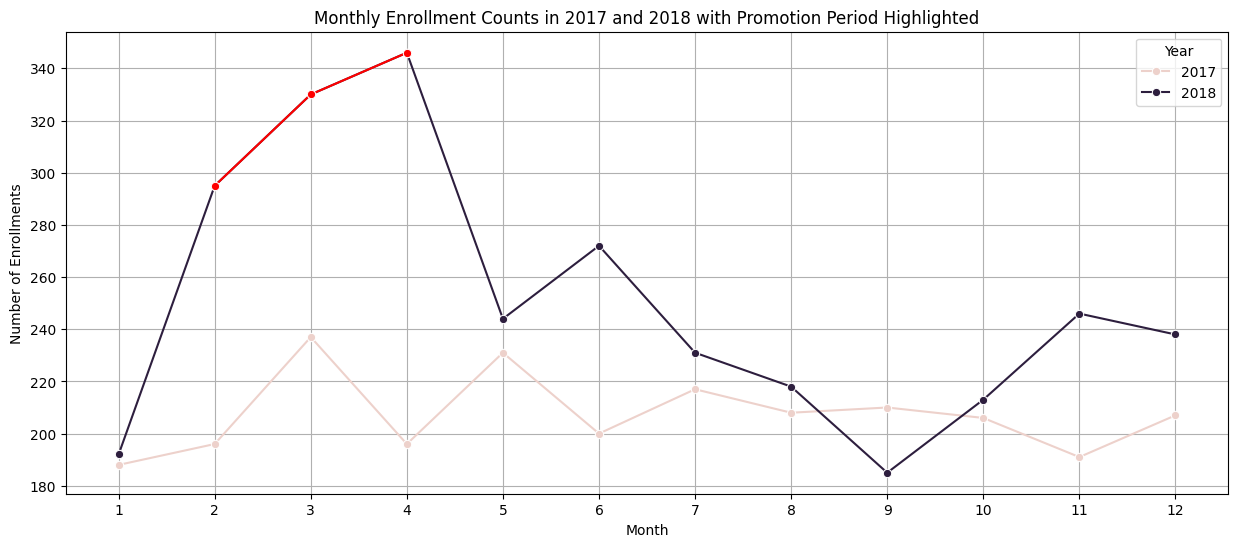

In [376]:
# Filtrar dados dos anos de 2017 e 2018
data_promocao = data_history[(data_history['Enrollment Year'] >= 2017) & 
                             (data_history['Enrollment Year'] <= 2018)]

# Contagem incrições por mês
contagem_inscricao = data_promocao.groupby(['Enrollment Year', 'Enrollment Month']).size().reset_index(name='Count')

# Highlighting the promotion period
contagem_inscricao['Promotion Period'] = contagem_inscricao.apply(
    lambda x: 'Fev-Abr 2018' if (x['Enrollment Year'] == 2018 and 2 <= x['Enrollment Month'] <= 4) else 'Other', 
    axis=1
)


# Plotting enrollments for 2017 and 2018 with the promotion period highlighted
plt.figure(figsize=(15, 6))
sns.lineplot(data=contagem_inscricao, x='Enrollment Month', y='Count', hue='Enrollment Year', marker='o')

# Adding a line for the promotion period
periodo_promocao = contagem_inscricao[contagem_inscricao['Promotion Period'] == 'Fev-Abr 2018']
sns.lineplot(data=periodo_promocao, x='Enrollment Month', y='Count', color='red', marker='o')

plt.title('Monthly Enrollment Counts in 2017 and 2018 with Promotion Period Highlighted')
plt.xlabel('Month')
plt.ylabel('Number of Enrollments')
plt.xticks(range(1, 13))
plt.legend(title='Year')
plt.grid(True)
plt.show()

## 1 - Qual a quantidade de clientes inscritos efetivos e quantidade de saintes da campanha?

In [370]:
# Quantidade de inscrições na campanha do ano de 2018
contagem_filtra_campanha = filtra_campanha.shape[0]

# Cancelamentos da campanha do ano de 2018 nos meses de Fevereiro, Março e Abril
promo_cancelada_2018 = data_history[(data_history['Enrollment Type'] == '2018 Promotion') & (data_history['Cancellation Month'].isin([2, 3, 4]))]

# Outputs
print('Cadastro na Promoção: ', contagem_filtra_campanha)
print('Cadastros Cancelados:', promo_cancelada_2018.shape[0])
print('Assinaturas finais da Promoção: ', contagem_filtra_campanha - promo_cancelada_2018.shape[0]) # Número de assinaturas que não foram canceladas.


Cadastro na Promoção:  971
Cadastros Cancelados: 4
Assinaturas finais da Promoção:  967


##### Identificamos que 971 clientes fizeram a inscrição no período da promoção, quatro cancelaram no mesmo período, restando 967 clientes com assinaturas efetivas da promoção.  

## 2 - A adoção da campanha foi mais bem-sucedida para certos dados demográficos de membros de fidelidade?


In [388]:
# Obter uma lista dos 'Loyalty Number' em promo_cancelada_2018
loyalty_numbers_canceladas = set(promo_cancelada_2018['Loyalty Number'])

# Remover as linhas de filtra_campanha que contêm 'Loyalty Number' em loyalty_numbers_canceladas
assinaturas_finais = filtra_campanha[~filtra_campanha['Loyalty Number'].isin(loyalty_numbers_canceladas)]

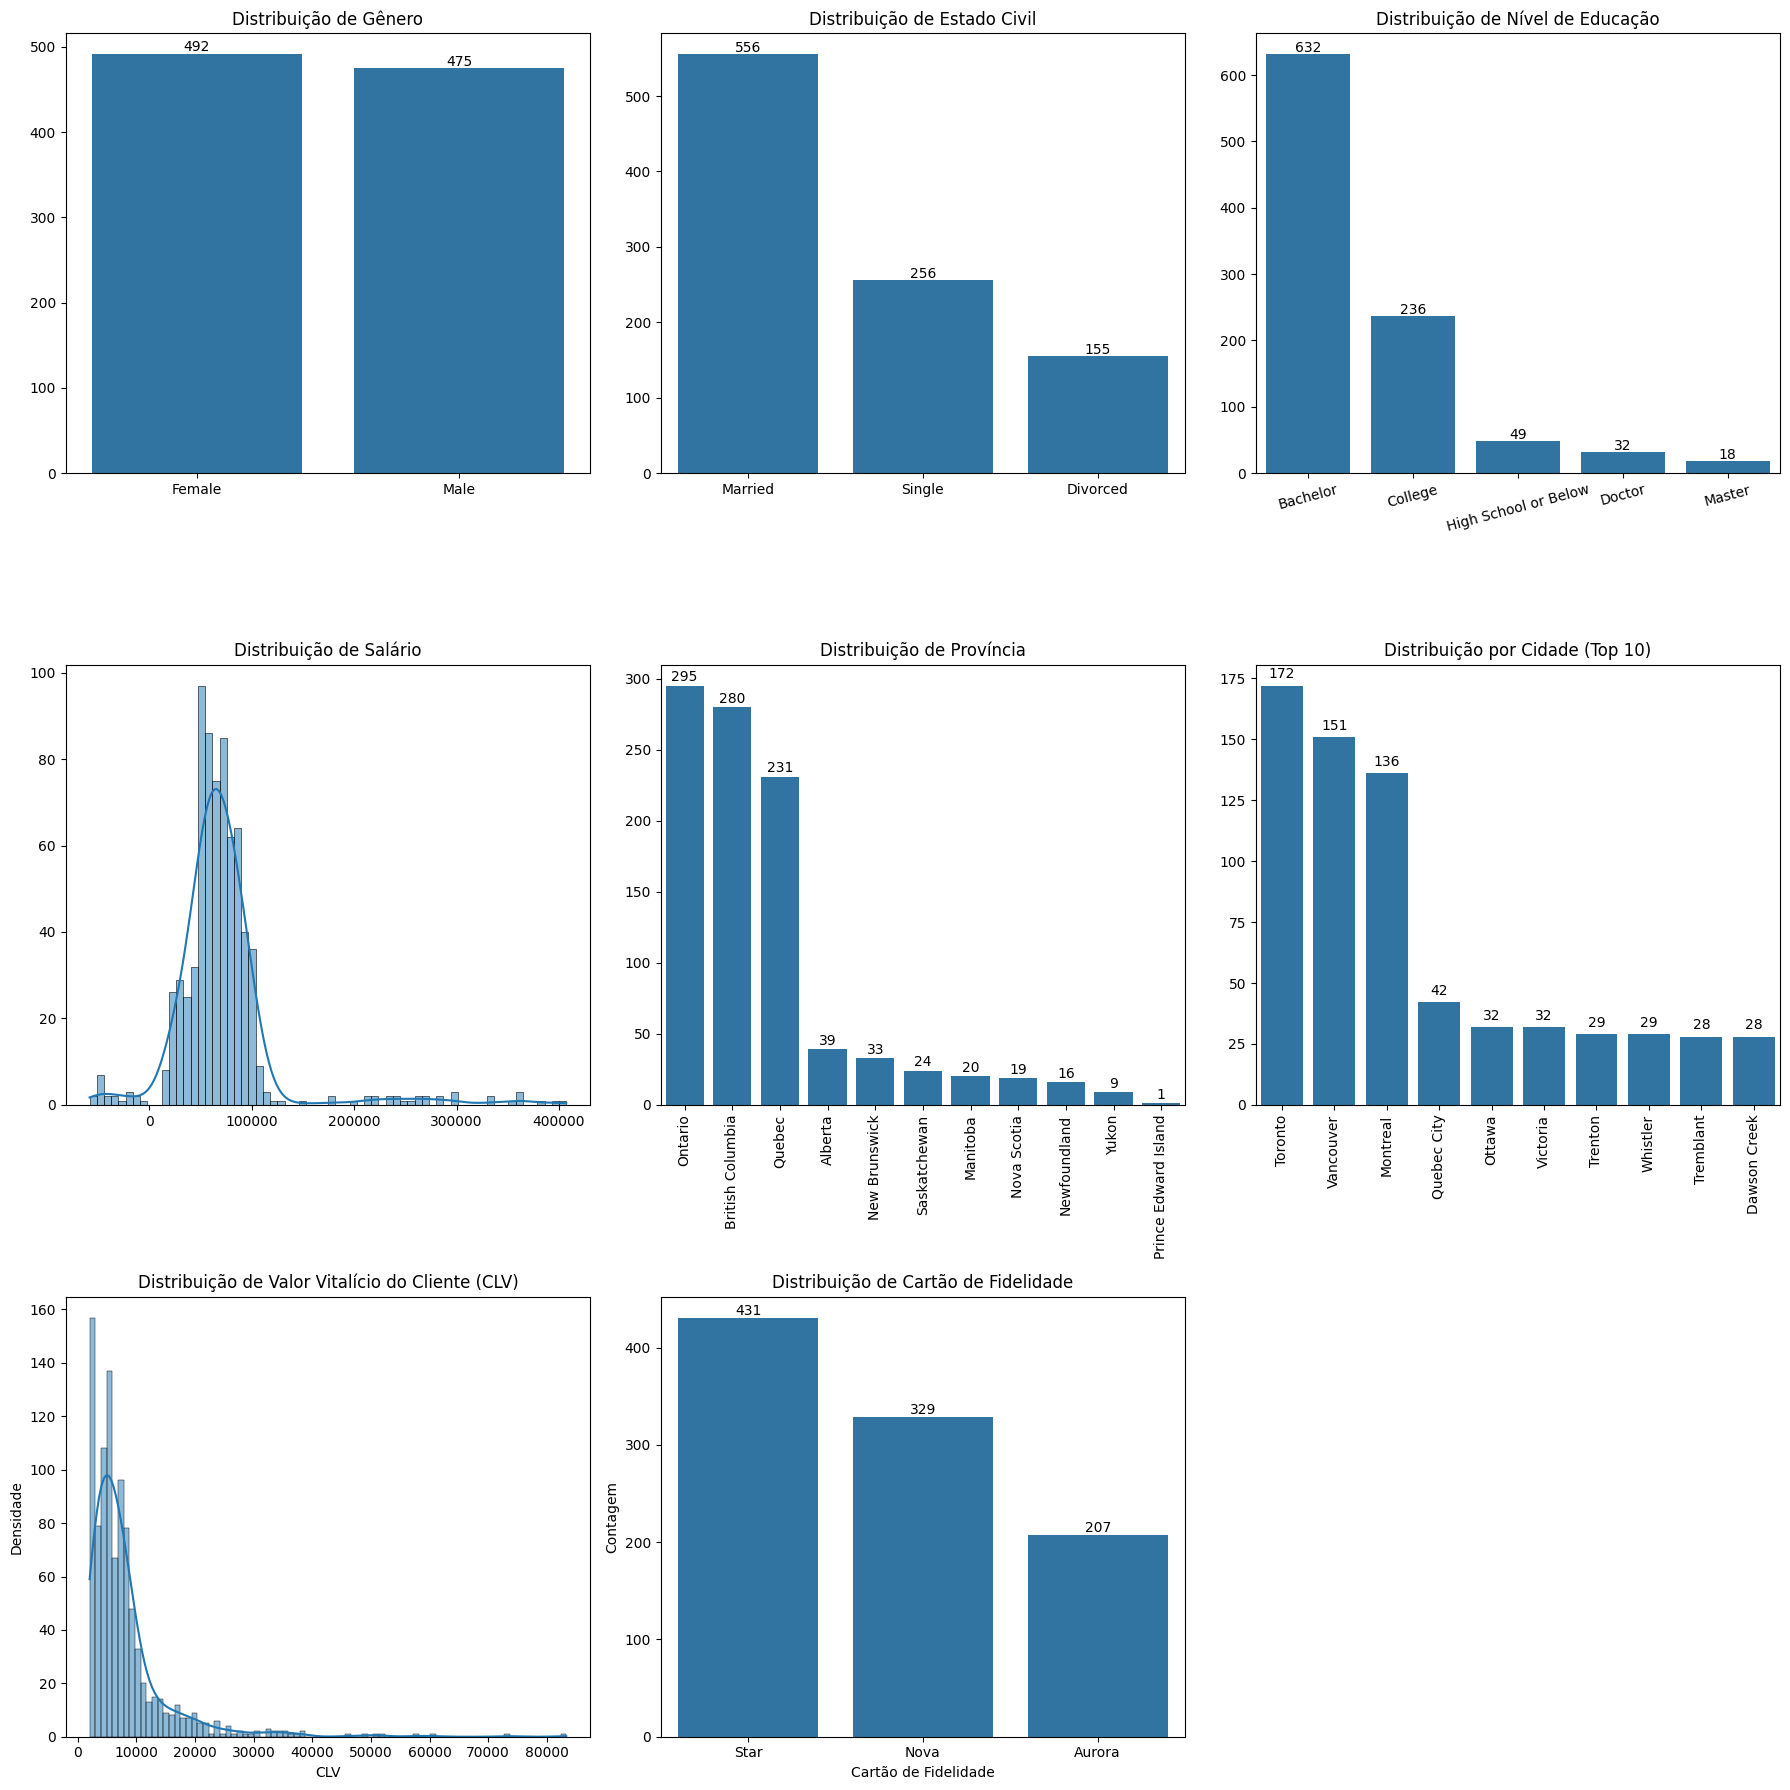

In [407]:
# Configurando o layout dos subplots
fig, axs = plt.subplots(3, 3, figsize=(18, 18))

# 1. Distribuição de Gênero
order = assinaturas_finais['Gender'].value_counts().index
ax1 = sns.countplot(data=assinaturas_finais, x='Gender', ax=axs[0, 0], order=order)
ax1.set_title('Distribuição de Gênero')
ax1.set_xlabel('')
ax1.set_ylabel('')

# Adicionando o valor total de cada barra
for p in ax1.patches:
    height = p.get_height()
    ax1.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.0f}'.format(height),
            ha="center") 

# 2. Distribuição de Estado Civil
order = assinaturas_finais['Marital Status'].value_counts().index
ax2 = sns.countplot(data=assinaturas_finais, x='Marital Status', ax=axs[0, 1], order=order)
ax2.set_title('Distribuição de Estado Civil')
ax2.set_xlabel('')
ax2.set_ylabel('')

# Adicionando o valor total de cada barra
for p in ax2.patches:
    height = p.get_height()
    ax2.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.0f}'.format(height),
            ha="center") 

# 3. Distribuição de Nível de Educação
order = assinaturas_finais['Education'].value_counts().index
ax3 = sns.countplot(data=assinaturas_finais, x='Education', ax=axs[0, 2], order=order)
ax3.set_title('Distribuição de Nível de Educação')
ax3.set_xlabel('')
ax3.set_ylabel('')
ax3.tick_params(axis='x', rotation=15)

# Adicionando o valor total de cada barra
for p in ax3.patches:
    height = p.get_height()
    ax3.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.0f}'.format(height),
            ha="center") 

# 4. Distribuição de Salário
sns.histplot(data=assinaturas_finais, x='Salary', kde=True, ax=axs[1, 0])
axs[1, 0].set_title('Distribuição de Salário')
axs[1, 0].set_xlabel('')
axs[1, 0].set_ylabel('')

# 5. Distribuição de Província
order = assinaturas_finais['Province'].value_counts().index
ax5 = sns.countplot(data=assinaturas_finais, x='Province', ax=axs[1, 1], order=order)
ax5.set_title('Distribuição de Província')
ax5.set_xlabel('')
ax5.set_ylabel('')
ax5.tick_params(axis='x', rotation=90)

# Adicionando o valor total de cada barra
for p in ax5.patches:
    height = p.get_height()
    ax5.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.0f}'.format(height),
            ha="center") 

# 6. Distribuição por Cidade (Top 10)
top_cities = assinaturas_finais['City'].value_counts().index[:10]
filtered_city_data = assinaturas_finais[assinaturas_finais['City'].isin(top_cities)]
ax6 = sns.countplot(data=filtered_city_data, x='City', ax=axs[1, 2], order=top_cities)
ax6.set_title('Distribuição por Cidade (Top 10)')
ax6.set_xlabel('')
ax6.set_ylabel('')
ax6.tick_params(axis='x', rotation=90)

# Adicionando o valor total de cada barra
for p in ax6.patches:
    height = p.get_height()
    ax6.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.0f}'.format(height),
            ha="center") 

# 7. Distribuição de Valor Vitalício do Cliente (CLV)
sns.histplot(data=assinaturas_finais, x='CLV', kde=True, ax=axs[2, 0])
axs[2, 0].set_title('Distribuição de Valor Vitalício do Cliente (CLV)')
axs[2, 0].set_xlabel('CLV')
axs[2, 0].set_ylabel('Densidade')

# 8. Distribuição de Cartão de Fidelidade (Loyalty Card)
order = assinaturas_finais['Loyalty Card'].value_counts().index
ax8 = sns.countplot(data=assinaturas_finais, x='Loyalty Card', ax=axs[2, 1], order=order)
ax8.set_title('Distribuição de Cartão de Fidelidade')
ax8.set_xlabel('Cartão de Fidelidade')
ax8.set_ylabel('Contagem')

# Adicionando o valor total de cada barra
for p in ax8.patches:
    height = p.get_height()
    ax8.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.0f}'.format(height),
            ha="center") 

# Removendo o subplot vazio
fig.delaxes(axs[2, 2])

# Ajustando o layout
plt.tight_layout()

# Mostrando o plot
plt.show()


Distribuição de Gênero: Há 494 indivíduos do gênero feminino e 477 do gênero masculino, indicando uma distribuição quase igual entre os gêneros.

Distribuição de Estado Civil: A maioria dos clientes é casada (558), seguida por solteiros (258) e divorciados (155).

Distribuição de Nível de Educação: A maior parte dos clientes possui bacharelado (632), seguida por aqueles com educação colegial (238), ensino médio (50), doutorado (32) e mestrado (19).

Distribuição de Salário: A distribuição de salários mostra uma concentração maior em faixas salariais mais baixas, com uma queda acentuada conforme o salário aumenta.

Distribuição de Província: A província com o maior número de clientes é a de Ontario (297), seguida por British Columbia (280) e Quebec (233). As outras províncias têm uma representação significativamente menor.

Distribuição por Cidade (Top 10): A cidade com o maior número de clientes é Toronto (173), seguida por Vancouver (151) e Montreal (138). As outras cidades do top 10 têm menos de 100 clientes cada.

Distribuição de Cartão de Fidelidade: Entre os tipos de cartões de fidelidade, o cartão Star é o mais comum (433), seguido pelo cartão Nova (330) e pelo cartão Aurora (208).

Essa análise descritiva sugere que a campanha de marketing pode ter tido mais sucesso entre indivíduos casados, com nível de educação de bacharelado, e residentes nas províncias de Star, Catina e Cygnus. Além disso, o cartão de fidelidade Star parece ser o mais popular entre os clientes. Essas informações podem ser úteis para direcionar futuras campanhas de marketing e para entender melhor o perfil dos clientes que se engajam com programas de fidelidade.

## 3 - Qual o resultado da campanha de 2018 comparada com os demais anos?

In [445]:
# Supondo que data_history é o seu DataFrame
data_history2 = data_history[data_history['Enrollment Type'] != '2018 Promotion']

# Juntando os DataFrames verticalmente
joined_data = pd.concat([data_history2, assinaturas_finais], ignore_index=True)

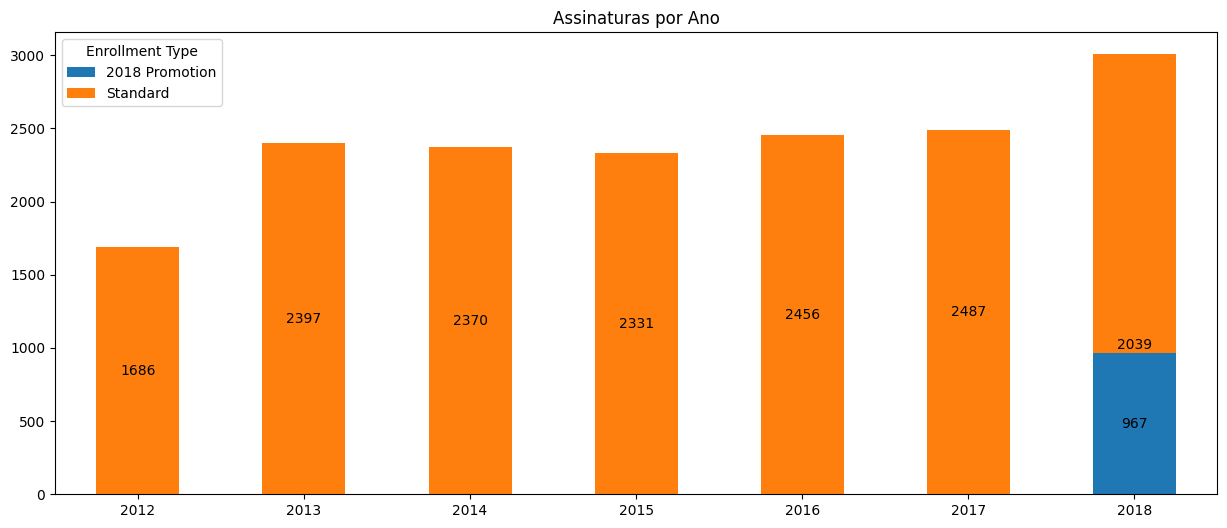

In [471]:
# Plot yearly enrolment count
loyalty_years = joined_data.groupby(['Enrollment Year', 'Enrollment Type']).size().rename('Count').reset_index()
loyalty_years = loyalty_years.pivot_table(columns='Enrollment Type', values='Count', index='Enrollment Year')


ax = loyalty_years.plot(kind='bar', stacked=True, figsize=(15, 6))
plt.title('Assinaturas por Ano')
plt.ylabel('')
plt.xlabel('')
plt.xticks(rotation = 0)

# Adicionando os valores totais de cada container de barra
for container in ax.containers:
    for bar in container:
        height = bar.get_height()
        if height > 0:
            ax.annotate(f'{int(height)}', xy=(bar.get_x() + bar.get_width() / 2, height / 2),
                        xytext=(0, 0), textcoords='offset points',
                        ha='center', va='center')

plt.show()

In [475]:
aumento_anual_pct = joined_data.groupby('Enrollment Year').size().rename('Count').reset_index()
round(aumento_anual_pct.Count.pct_change()*100)

0     NaN
1    42.0
2    -1.0
3    -2.0
4     5.0
5     1.0
6    21.0
Name: Count, dtype: float64

In [477]:
967/3006

0.3216899534264804

## 4 - Que impacto teve a campanha nos voos reservados durante o verão de 2018?

In [553]:
# Agrupando os dados por mês e ano e somando o total de voos
aux1 = data_flight.groupby(['Month', 'Year'])['Total Flights'].sum().reset_index()

# Mapeando os números dos meses para os nomes dos meses
month_mapping = {1: 'Janeiro', 2: 'Fevereiro', 3: 'Março', 4: 'Abril', 5: 'Maio', 6: 'Junho', 7: 'Julho', 8: 'Agosto', 9: 'Setembro', 10: 'Outubro', 11: 'Novembro', 12: 'Dezembro'}
aux1['Month'] = aux1['Month'].map(month_mapping)
aux1

,Month,Year,Total Flights
0,Janeiro,2017,59888
1,Janeiro,2018,59751
2,Fevereiro,2017,59760
3,Fevereiro,2018,59089
4,Março,2017,80140
5,Março,2018,82119
6,Abril,2017,70015
7,Abril,2018,69263
8,Maio,2017,81353
9,Maio,2018,96450


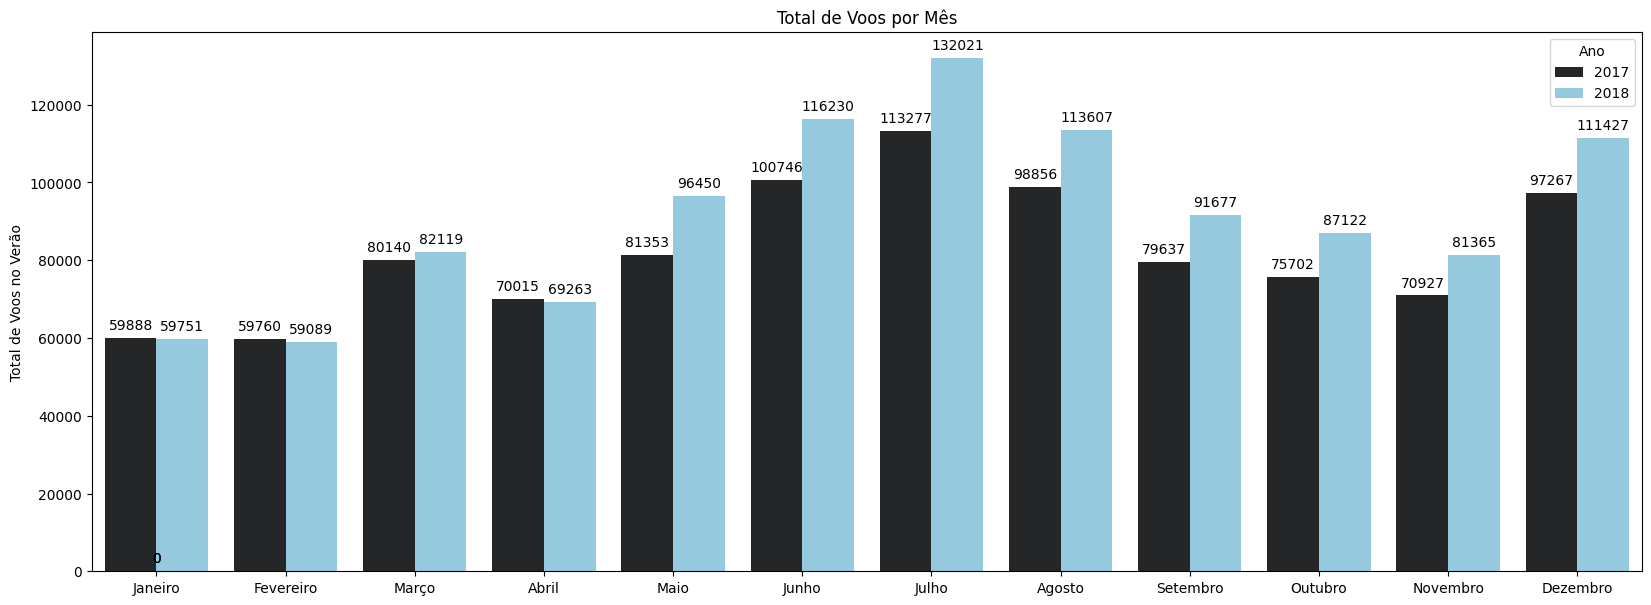

In [556]:
# Cria o gráfico de barras
plt.figure(figsize=(20, 7))
barplot = sns.barplot(data=aux1, x='Month', y='Total Flights', hue='Year', color='skyblue')
plt.title('Total de Voos por Mês')
plt.xlabel('')
plt.ylabel('Total de Voos no Verão')
plt.legend(title='Ano')

# Adiciona o valor total em cada coluna
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.0f'), 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', 
                    xytext=(0, 9), 
                    textcoords='offset points')

plt.show()

In [557]:
# Selecionando apenas os meses Junho, Julho e Agosto
aux2 = aux1[aux1['Month'].isin(['Junho', 'Julho', 'Agosto'])]
aux2

,Month,Year,Total Flights
10,Junho,2017,100746
11,Junho,2018,116230
12,Julho,2017,113277
13,Julho,2018,132021
14,Agosto,2017,98856
15,Agosto,2018,113607


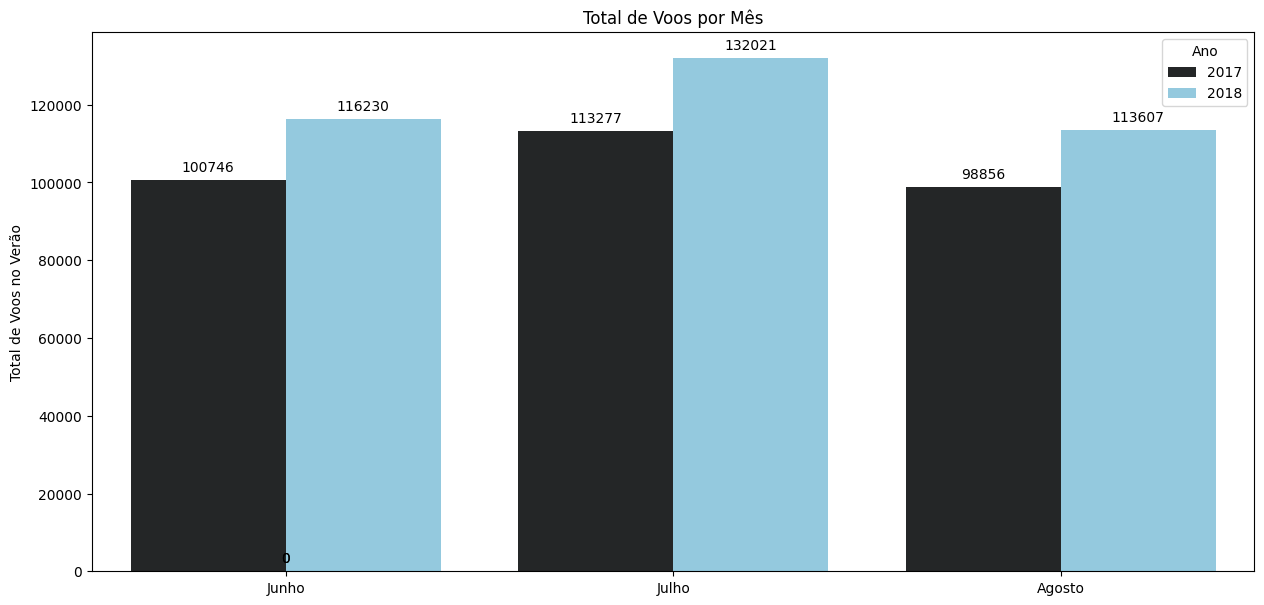

In [558]:
# Cria o gráfico de barras
plt.figure(figsize=(15, 7))
barplot = sns.barplot(data=aux2, x='Month', y='Total Flights', hue='Year', color='skyblue')
plt.title('Total de Voos por Mês')
plt.xlabel('')
plt.ylabel('Total de Voos no Verão')
plt.legend(title='Ano')

# Adiciona o valor total em cada coluna
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.0f'), 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', 
                    xytext=(0, 9), 
                    textcoords='offset points')

plt.show()

In [261]:
# Selecionando apenas os meses Junho, Julho e Agosto
aux3 = data_flight.groupby(['Month', 'Year'])['Total Flights'].sum().reset_index()

# Calculando a variação percentual entre os meses
aux3['Variação Percentual (%)'] = ((aux1['Total Flights'] - aux1.groupby('Month')['Total Flights'].shift()) / aux1.groupby('Month')['Total Flights'].shift()) * 100

# Exibindo o DataFrame resultante
aux3.groupby('Month')['Variação Percentual (%)'].sum().reset_index()

,Month,Variação Percentual (%)
0,1,-0.228760
1,2,-1.122825
2,3,2.469429
3,4,-1.074056
4,5,18.557398
5,6,15.369345
6,7,16.547048
7,8,14.921704
8,9,15.118601
9,10,15.085467


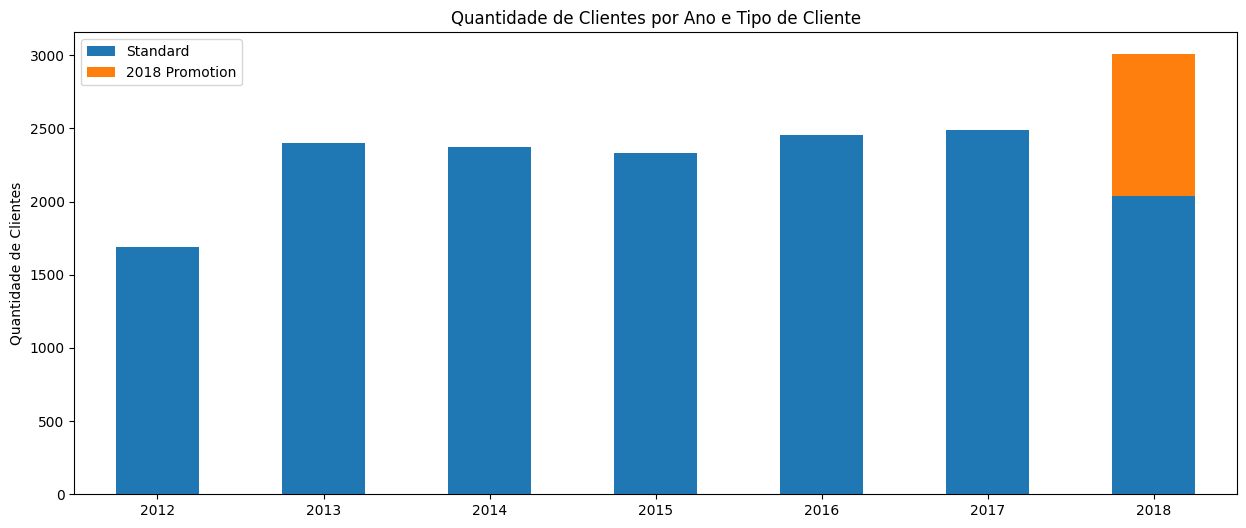

In [658]:
# Contar a quantidade de clientes por ano e por tipo de cliente
clients_per_year_and_type = joined_data.groupby(['Enrollment Year', 'Enrollment Type']).size().unstack(fill_value=0)

# Reorganizar as colunas para que "Standard" esteja na base
clients_per_year_and_type = clients_per_year_and_type[['Standard', '2018 Promotion']]

# Plotar o gráfico
clients_per_year_and_type.plot(kind='bar', stacked=True, figsize=(15, 6))
plt.title('Quantidade de Clientes por Ano e Tipo de Cliente')
plt.xlabel('')
plt.ylabel('Quantidade de Clientes')
plt.xticks(rotation=0)
plt.legend()

plt.show()
